Objective- Explore hospitalization data trends for men and women with diabetes across various age ranges who were prescribed diabetic medication. 

Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import csv file with diabetes data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

Explore data by viewing the first 5 rows and last 5 rows:

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


View list of column labels:

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Use info() method to print information about the data set (number of columns, column labels, total non-null cells, data types, memory usage):

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Limit dataset by dropping columns using the drop() method:

In [6]:
drop_cols = ['race', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty', 'num_medications',
       'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change']
df.drop(drop_cols, inplace=True, axis=1)

View first 5 rows of reduced dataset:

In [7]:
df.head()

,encounter_id,patient_nbr,gender,age,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,diabetesMed,readmitted
0,2278392,8222157,Female,[0-10),1,41,0,0,No,NO
1,149190,55629189,Female,[10-20),3,59,0,0,Yes,>30
2,64410,86047875,Female,[20-30),2,11,5,2,Yes,NO
3,500364,82442376,Male,[30-40),2,44,1,0,Yes,NO
4,16680,42519267,Male,[40-50),1,51,0,0,Yes,NO


Rename column labels to improve readability:

In [8]:
df = df.rename(columns = {'encounter_id':'Encounter ID', 'patient_nbr':'Patient ID', 'gender':'Gender', 'age':'Age Range', 'time_in_hospital':'Days Inpatient', 'num_lab_procedures':'Total Labs', 'num_procedures':'Total Procedures', 'number_outpatient':'Total Outpatient Visits Prior to Admission', 'diabetesMed':'Diabetes Med Rx', 'readmitted':'Readmission Post Discharge'})
df

,Encounter ID,Patient ID,Gender,Age Range,Days Inpatient,Total Labs,Total Procedures,Total Outpatient Visits Prior to Admission,Diabetes Med Rx,Readmission Post Discharge
0,2278392,8222157,Female,[0-10),1,41,0,0,No,NO
1,149190,55629189,Female,[10-20),3,59,0,0,Yes,>30
2,64410,86047875,Female,[20-30),2,11,5,2,Yes,NO
3,500364,82442376,Male,[30-40),2,44,1,0,Yes,NO
4,16680,42519267,Male,[40-50),1,51,0,0,Yes,NO
...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,Male,[70-80),3,51,0,0,Yes,>30
101762,443847782,74694222,Female,[80-90),5,33,3,0,Yes,NO
101763,443854148,41088789,Male,[70-80),1,53,0,1,Yes,NO
101764,443857166,31693671,Female,[80-90),10,45,2,0,Yes,NO


Check for missing values:

In [9]:
df.isnull().sum()

Encounter ID                                  0
Patient ID                                    0
Gender                                        0
Age Range                                     0
Days Inpatient                                0
Total Labs                                    0
Total Procedures                              0
Total Outpatient Visits Prior to Admission    0
Diabetes Med Rx                               0
Readmission Post Discharge                    0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

Filter by Gender (Female/Male) and patients with a prescription for diabetes medication (Yes):

In [11]:
df1 = df.loc[((df['Gender'] == 'Female') & (df['Diabetes Med Rx'] == 'Yes') | (df['Gender'] == 'Male') & (df['Diabetes Med Rx'] == 'Yes'))]
df1

,Encounter ID,Patient ID,Gender,Age Range,Days Inpatient,Total Labs,Total Procedures,Total Outpatient Visits Prior to Admission,Diabetes Med Rx,Readmission Post Discharge
1,149190,55629189,Female,[10-20),3,59,0,0,Yes,>30
2,64410,86047875,Female,[20-30),2,11,5,2,Yes,NO
3,500364,82442376,Male,[30-40),2,44,1,0,Yes,NO
4,16680,42519267,Male,[40-50),1,51,0,0,Yes,NO
5,35754,82637451,Male,[50-60),3,31,6,0,Yes,>30
...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,Female,[60-70),6,45,1,3,Yes,>30
101761,443847548,100162476,Male,[70-80),3,51,0,0,Yes,>30
101762,443847782,74694222,Female,[80-90),5,33,3,0,Yes,NO
101763,443854148,41088789,Male,[70-80),1,53,0,1,Yes,NO


Visualize relationships between variables within the dataset using Pairplot:

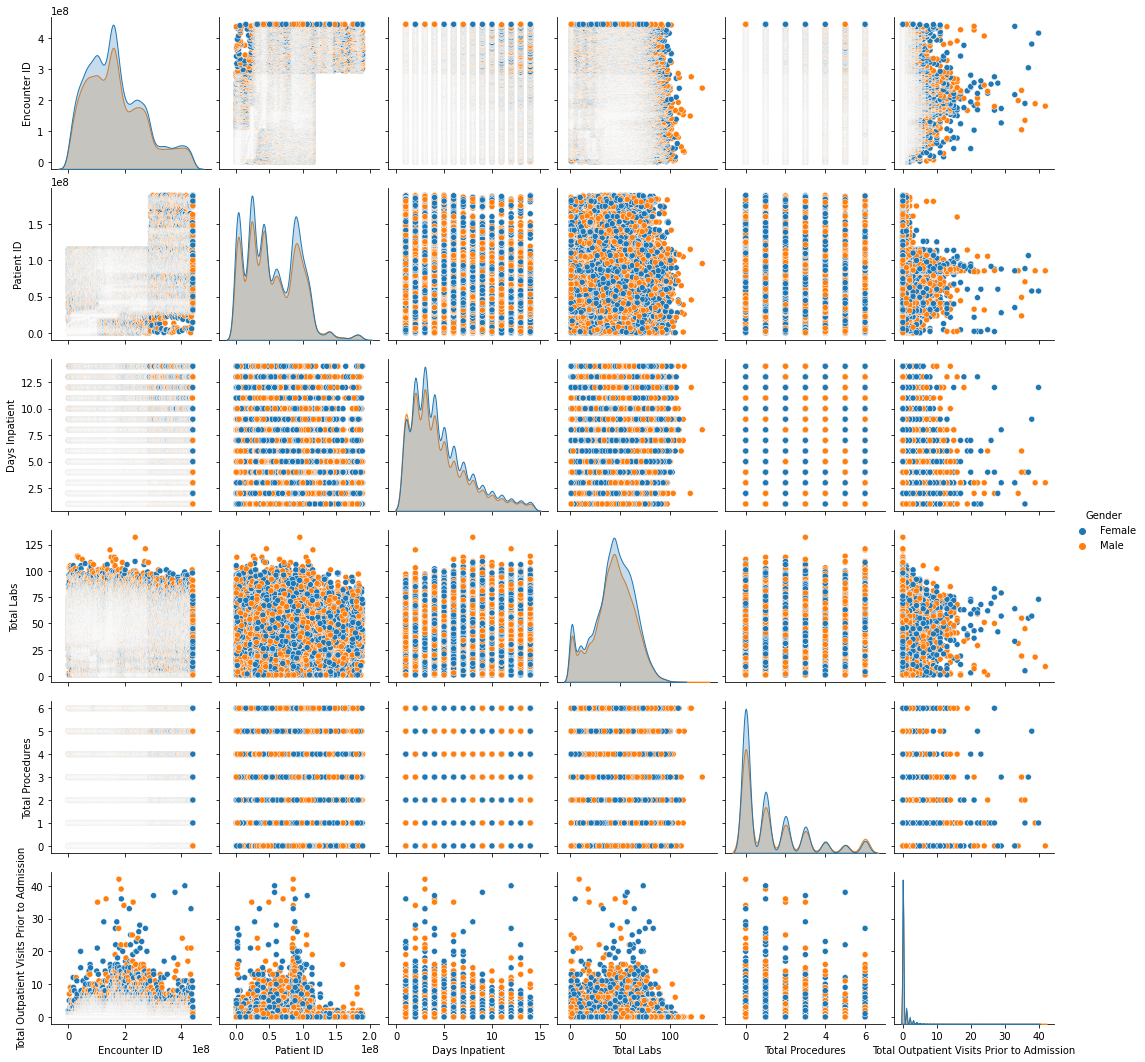

In [12]:
sns.pairplot(df1,hue='Gender')

Compute sum of inpatient days by Gender and Age Range

In [13]:
df1.groupby(['Gender','Age Range'])['Days Inpatient'].sum()

Gender  Age Range
Female  [0-10)         199
        [10-20)       1027
        [20-30)       3170
        [30-40)       6254
        [40-50)      15177
        [50-60)      28577
        [60-70)      39317
        [70-80)      51532
        [80-90)      39175
        [90-100)      6764
Male    [0-10)         154
        [10-20)        888
        [20-30)       1606
        [30-40)       4959
        [40-50)      15458
        [50-60)      28090
        [60-70)      39614
        [70-80)      43320
        [80-90)      24370
        [90-100)      2815
Name: Days Inpatient, dtype: int64

Visualize total Days Inpatient by Age Range and Gender:

<AxesSubplot:xlabel='Days Inpatient', ylabel='Age Range'>

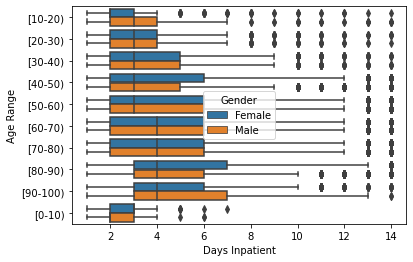

In [14]:
sns.boxplot(x='Days Inpatient', y='Age Range', data=df1, hue='Gender')

Compute sum of outpatient visits prior to admission by Gender and Age Range:

In [15]:
df1.groupby(['Gender','Age Range'])['Total Outpatient Visits Prior to Admission'].sum()

Gender  Age Range
Female  [0-10)          2
        [10-20)        78
        [20-30)       380
        [30-40)       601
        [40-50)      1465
        [50-60)      2330
        [60-70)      3689
        [70-80)      4464
        [80-90)      3042
        [90-100)      402
Male    [0-10)          0
        [10-20)        22
        [20-30)        71
        [30-40)       241
        [40-50)      1046
        [50-60)      2186
        [60-70)      3263
        [70-80)      3806
        [80-90)      2526
        [90-100)      223
Name: Total Outpatient Visits Prior to Admission, dtype: int64

Visualize total outpatient visits prior to admission by age range and gender:

<AxesSubplot:xlabel='Total Outpatient Visits Prior to Admission', ylabel='Age Range'>

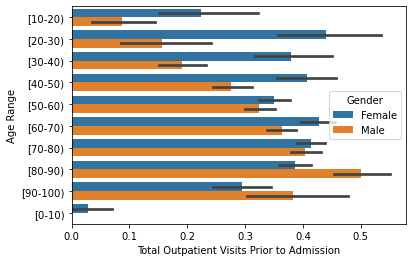

In [16]:
sns.barplot(x='Total Outpatient Visits Prior to Admission', y='Age Range', data=df1, hue='Gender')

Conclusion: 

Women and men age 70-80 years who were prescribed a diabetes medication spent the most days inpatient and had the highest number of outpatient visits prior to hospital admission. 

We can conclude that women and men in age group 70-80 years old with diabetes are at risk of being hospitalized longer and require more outpatient care than other age groups. Of the two gender groups, women are at higher risk compared to men. 
